In [1]:
#this is to import the libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#creating the environment
#note this is the 1D environment
class environment :
    def __init__ (self , x , D):
        self.Dimension = D
        self.L = x
    
    #this is to define wether the agent is in limits of the state space or not
    def inbound(self , x):
        for value in x:
            if (value < 0 or value > self.L):
                return False
        return True
    
    #this is to define when the agent reaches the goal state
    def reached_goal_state (self , x):
        s = 0
        
        #finding the sum and checking wether sum is equal to D * L or not
        for value in x :
            s += value
            
        if (s == self.Dimension*self.L):
            return True
        return False

In [3]:
class Agent :
    def __init__ (self, x , D):
        self.position = [x for _ in range(D)]   
    
    #these are the actions that the agent can take
    def move(self, env , move_number):
        
        #move_number determines the move
        #here we extract the dimension alongwhich to move and wether to increase or decrease it
        moving_dimension = move_number // 2
        direction = move_number % 2
        
        #this is to chose the direction along which to move
        #if the direction is 0 then decrement in that direcion
        if (direction == 0):
            self.position[moving_dimension] -= 1
            if (not env.inbound(self.position)):
                self.position[moving_dimension] += 1
                
        #if the direction is 1 then increment in that direction
        else:
            self.position[moving_dimension] += 1
            if (not env.inbound(self.position)):
                self.position[moving_dimension] -= 1

In [4]:
#this function takes the dimension and the L as the argument
#and then calculates the number of moves it takes for the agent to return to the environment

def solve (dimension , L):
    #initialising the agent and the environment
    env = environment(L , dimension)
    agent = Agent(L//2 , dimension)

    
    #number of moves to keep track of the number of moves
    number_of_moves = 0
    while (not env.reached_goal_state(agent.position) == True):
        #selecting the move and then moving accordingly
        m = random.randint(0 , 2*env.Dimension - 1)  
        agent.move(env, m)
        number_of_moves +=1

    return number_of_moves

In [5]:
#testing for different test cases
dimension = 3
L = 10
moves = 0

#running for 100 iterations
for i in range(100):
    temp = solve(dimension , L)
    #print("Iteration " , i+1 , " " , temp)
    moves += temp
    
print("Average " , moves/100)

Average  5773.05


In [6]:
#plotting the function
dimension = 2
L = np.arange(0 , 12)
ans = np.zeros(L.shape)

for i in L:
    print("Iteration number : " , i)
    for _ in range(5):
        ans[i] += solve(dimension , i)
    ans[i] = ans[i] / 5

Iteration number :  0
Iteration number :  1
Iteration number :  2
Iteration number :  3
Iteration number :  4
Iteration number :  5
Iteration number :  6
Iteration number :  7
Iteration number :  8
Iteration number :  9
Iteration number :  10
Iteration number :  11


Text(0.5,1,'Analysis')

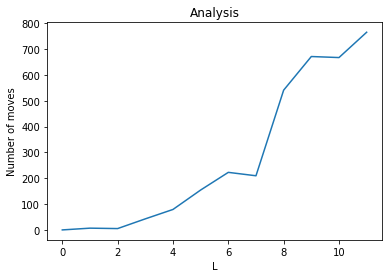

In [7]:
#plotting the graph
plt.plot (L , ans)
plt.xlabel("L")
plt.ylabel("Number of moves")
plt.title("Analysis")

In [8]:
#plotting the function
dimension = np.arange(5)
L = 10
ans = np.zeros(dimension.shape)

for i in dimension:
    print("Iteration number : " , i)
    for _ in range(2):
        ans[i] += solve(i+1 , L)
    ans[i] = ans[i] / 2

Iteration number :  0
Iteration number :  1
Iteration number :  2
Iteration number :  3
Iteration number :  4


Text(0.5,1,'analysis')

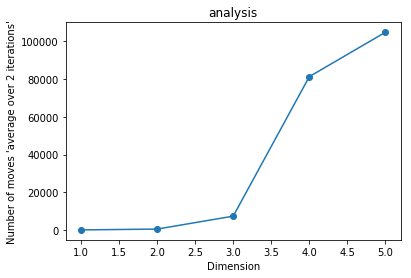

In [9]:
plt.figure(figsize = (6 , 4))
plt.plot(dimension+1 , ans , marker = 'o')
plt.xlabel("Dimension")
plt.ylabel("Number of moves 'average over 2 iterations'")
plt.title("analysis")